# Fortune Cookie

Thought [Isaac Slavitt's fortune cookie problem](http://isaacslavitt.com/2016/07/04/stochastic-fortune-cookies/) was a cool use of `PyMC3`.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import numpy as np
import pandas as pd
import pymc3 as pm
import theano.tensor as tt
from scipy import stats as st

from utils import plt, sns

In [2]:
data = np.array([
    [35, 26, 56, 10, 32, 52],
    [26, 38, 2, 23, 27, 50],
    [11, 34, 24, 49, 2, 45],
    [14, 1, 55, 19, 32, 45],

    # Sampled these from his Google image search
    [37, 53, 1, 17, 32, 42],
    [26, 55, 25, 51, 11, 27]
])

In [3]:
with pm.Model() as model:
    # Priors
    digit = pm.DiscreteUniform("digit", lower=1, upper=1000)

    # Likelihood
    y = pm.DiscreteUniform("y", lower=1, upper=digit, observed=data.ravel())

    # Sample
    trace = pm.sample(draws=20000, njobs=4, chain=4)
    
burn_in = 10000
trace = trace[burn_in:]

Assigned Metropolis to digit
100%|██████████| 20000/20000 [00:02<00:00, 8246.76it/s]



digit:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  57.243           1.753            0.032            [56.000, 61.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  56.000         56.000         57.000         58.000         62.000

None


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116dd9b10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x116f99ad0>]], dtype=object)

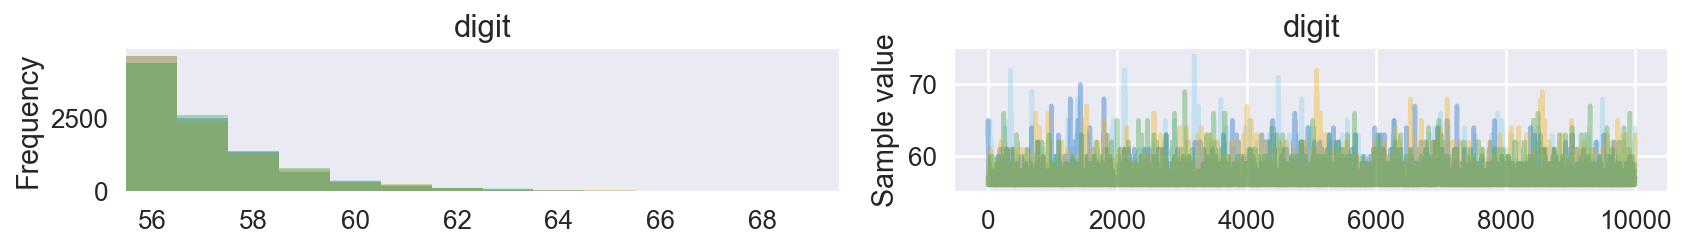

In [4]:
print(pm.summary(trace))
pm.traceplot(trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x117184310>], dtype=object)

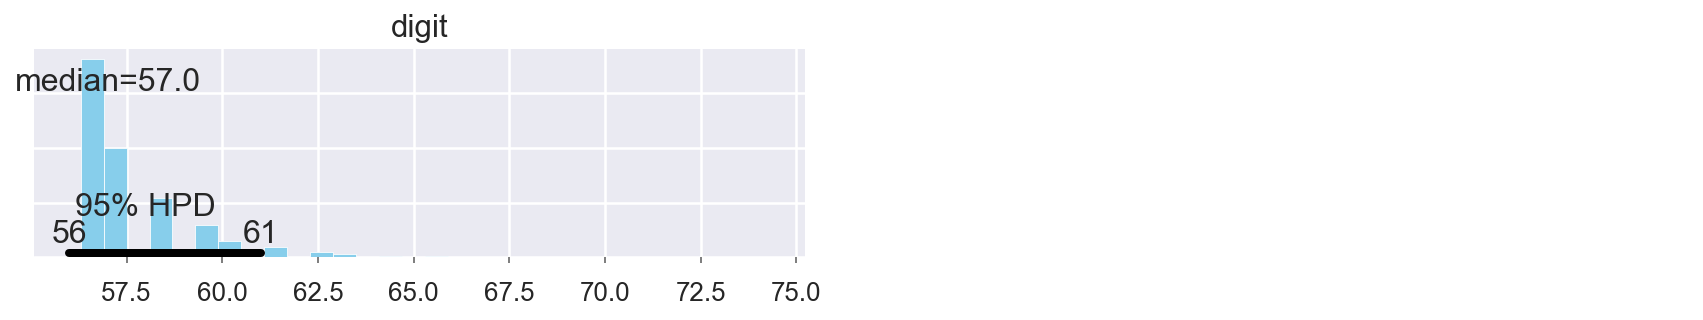

In [5]:
pm.plot_posterior(trace, point_estimate="median")

In [6]:
pm.diagnostics.gelman_rubin(trace)

{'digit': 1.001505313692006}